## Fundamentals of ML
### Intro to language modelling: Multi Layer Perceptron

### [Makemore](https://github.com/karpathy/nn-zero-to-hero/tree/master/lectures/makemore) by Andrej Karpathy
### [Bengio et al. 2003 MLP language model paper (pdf)](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

![simple_MLP_for_LM](./images/simple_MLP_for_LM.png)

In [19]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures

In [20]:
words = open('../ml_with_python/resources/names.txt', 'r').read().splitlines()

In [21]:
words[:7]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia']

In [22]:
len(words)

32033

In [23]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [24]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:7]:
  
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .
charlotte
... ---> c
..c ---> h
.ch ---> a
cha ---> r
har ---> l
arl ---> o
rlo ---> t
lot ---> t
ott ---> e
tte ---> .
mia
... ---> m
..m ---> i
.mi ---> a
mia ---> .


In [25]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y


In [26]:
X, Y = build_dataset(words[:5])
print((X.shape, X.dtype), '\n', (Y.shape, Y.dtype))

torch.Size([32, 3]) torch.Size([32])
(torch.Size([32, 3]), torch.int64) 
 (torch.Size([32]), torch.int64)


In [27]:
import random
random.seed(42)

# build the dataset
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [28]:
C = torch.randn((27, 2))
C.shape

torch.Size([27, 2])

In [29]:
C[5]

tensor([-0.3407, -0.0707])

In [30]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [31]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.3407, -0.0707])

In [32]:
C[torch.tensor([5,5,5,5])]

tensor([[-0.3407, -0.0707],
        [-0.3407, -0.0707],
        [-0.3407, -0.0707],
        [-0.3407, -0.0707]])

In [36]:
emb = C[X]
print(X.shape, '\n', emb.shape)

torch.Size([32, 3]) 
 torch.Size([32, 3, 2])


In [37]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [38]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [39]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [40]:
h.shape

torch.Size([32, 100])

In [20]:
h

tensor([[ 0.9995,  0.9992,  0.1798,  ...,  0.9972, -0.9922, -1.0000],
        [ 0.9688,  0.9999,  0.9619,  ...,  0.9902, -0.9463, -0.9999],
        [ 0.9991,  0.9980,  0.9979,  ...,  0.9654, -0.8197, -0.9989],
        ...,
        [ 0.9978,  1.0000, -0.5673,  ...,  0.7022, -0.5082, -0.9966],
        [ 0.8853,  0.9998, -0.3216,  ...,  0.8527, -0.4385, -0.2904],
        [-0.8418,  0.9968, -0.8699,  ...,  0.3557, -0.2803, -0.9276]])

In [41]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [42]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [43]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob.shape

torch.Size([32, 27])

In [44]:
Y, len(Y)

(tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]),
 32)

In [45]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(19.2411)

In [46]:
# the same result, but much more optimal
F.cross_entropy(logits, Y)

tensor(19.2411)

In [27]:
# ------------ now made respectable :) ---------------

In [47]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [48]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g) # need (27, 10) for better loss 
W1 = torch.randn((6, 200), generator=g) # and then here is 30 too of course
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [49]:
sum(p.nelement() for p in parameters) # number of parameters in total

6881

In [50]:
for p in parameters:
  p.requires_grad = True

In [51]:
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10**lre
# 
# lri = []
lossi = []
stepi = []

for i in range(20000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 10000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

20.69060707092285
20.02469253540039
21.129072189331055
17.30799102783203
16.598047256469727
13.195404052734375
14.401287078857422
15.14363956451416
12.161104202270508
15.988545417785645
14.768774032592773
7.948514461517334
15.005204200744629
11.221349716186523
10.474078178405762
10.385372161865234
10.428723335266113
11.842324256896973
9.164916038513184
7.211575984954834
10.954483032226562
7.98978328704834
7.533624649047852
7.375584602355957
6.528796672821045
6.517855167388916
6.099282264709473
8.719677925109863
10.277050971984863
7.4967827796936035
7.724743843078613
7.699939250946045
6.210605144500732
7.4281392097473145
5.607130527496338
5.386898040771484
6.573680877685547
5.798266887664795
8.764989852905273
5.302668571472168
5.595449924468994
6.637142658233643
5.720057010650635
5.223781108856201
5.329232692718506
6.149926662445068
4.7684736251831055
5.506688117980957
5.550459861755371
5.617332935333252
5.798338890075684
4.617182731628418
3.8840551376342773
4.608794212341309
6.43522834

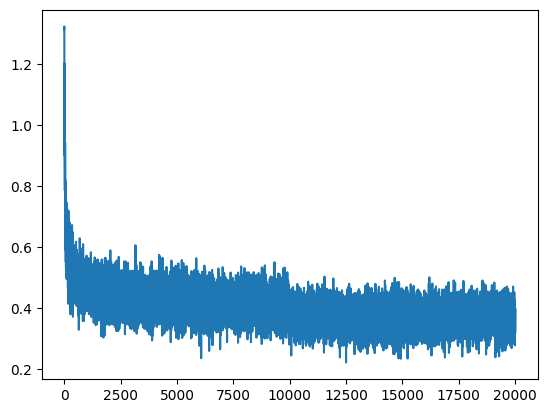

In [52]:
plt.plot(stepi, lossi);

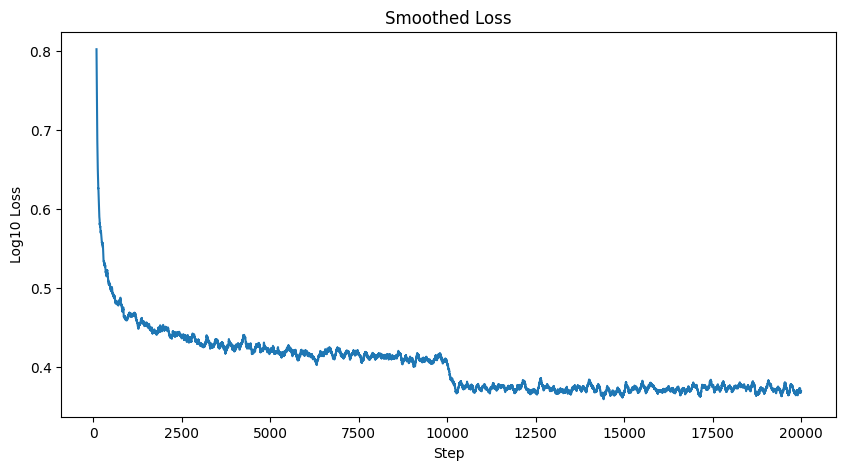

In [54]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3700, grad_fn=<NllLossBackward0>)

In [55]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3722, grad_fn=<NllLossBackward0>)

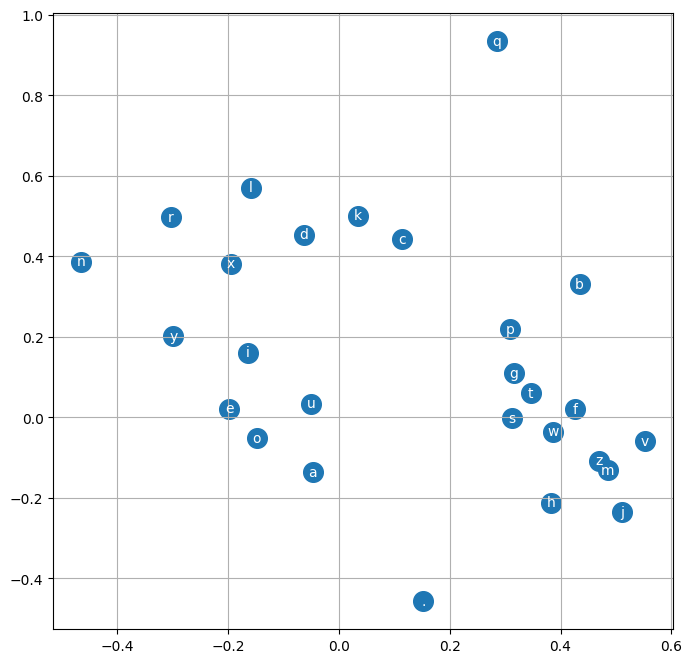

In [56]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [37]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 2])

In [58]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(15):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

careah.
amelle.
khiimlex.
tatyah.
cassae.
mahnen.
ameryat.
kaeli.
neleniah.
maiiv.
kaleig.
dham.
jois.
quilu.
sroilea.


What else can you check out?
 
[Building makemore Part2: MLP](https://youtu.be/TCH_1BHY58I)